# Home Credit Default Risk Analysis and Modeling

## Importing Libraries
We are using core data science library stack:
- numpy
- pandas
- sklearn
- matplotlib
- seaborn

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## Read Training dataset

In [69]:
application_train_df = pd.read_csv('assets/application_train.csv')
print(f'Training dataset has {application_train_df.shape[0]} rows and {application_train_df.shape[1]} columns')
application_train_df.head(10)

Training dataset has 307511 rows and 122 columns


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

### Check null Values by Column

In [70]:
def null_values_analisis(_df: pd.DataFrame) -> pd.DataFrame:
    
    null_values = _df.isnull().sum()
    null_values_percentage = (null_values / _df.shape[0])*100
    
    null_values_by_column = pd.concat([null_values, null_values_percentage], axis=1)
    null_values_by_column.columns = ['Missing Values (COUNT)', 'Missing Values (%)']
    
    null_values_by_column = null_values_by_column[null_values_by_column['Missing Values (COUNT)'] != 0]
    
    return null_values_by_column.sort_values(ascending=False, by='Missing Values (%)')

application_train_null_values_df = null_values_analisis(application_train_df)
application_train_null_values_df.head(50)

,Missing Values (COUNT),Missing Values (%)
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


Al parecer todas las columnas que presentan el sufijo _AVG, _MEDI, _MODE, tiene un nivel de valores nulos muy grande y según la documentaciíon dad por Kaggle hace referencia a datos normalizados estadísticamente pero siguen sin tener al parecer un peso importante, podríamos considerar retiarlos de la muestra dado a que no pueden aportar ningun valor o tendencia significativa

In [71]:
cols_to_drop = application_train_df.columns[application_train_df.columns.str.contains(r'(_AVG$|_MODE$|_MEDI$)')]
# Eliminar las columnas seleccionadas
application_train_df.drop(columns=cols_to_drop, inplace=True)

/tmp/ipykernel_141223/2888977648.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cols_to_drop = application_train_df.columns[application_train_df.columns.str.contains(r'(_AVG$|_MODE$|_MEDI$)')]


### Checking Column Data Types

Veamos primero cuantos tipos de datos distintos hay y cuantos tienen cada uno

In [72]:
application_train_df.dtypes.value_counts()

int64      41
float64    22
object     12
Name: count, dtype: int64

Identificaremos primero que columnas son de tipo `object` daddo que estas presentan carácteres alfanuméricos los cuales al momento de ser análisis de los mismos o incluso construir un modelo de IA predictivo o de selección de datos necesitamos manejarlos como valores

In [73]:
# Check String columns to see unque values and detect categorical columns
application_train_dtypes_df = application_train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

application_train_dtypes_df

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

Nosotros queremos crear un estandar en el desarrollo del proyecto haciendo que para columnas con valores únicos iguales a 2 se manejen con label-encondig y las demás que son superiores se manejen con One Hot Encoding ¿Por qué? evitar que el paso de caracteristcas textuales a numéricas estén generando un peso numérico que no existe en las columnas y evitar el cesgo, pero como primer paso debemos identificar para las columnas de 3 valores unicos si pueden ser reducidos a 2

### Check and Normalize CODE_GENDER

In [74]:
print(application_train_df['CODE_GENDER'].value_counts())
print('='*5, 'NORMALIZE', '='*5)
# PUEDE SER FILLEADO
application_train_df['CODE_GENDER'] = application_train_df['CODE_GENDER'].replace('XNA', 'F')
print('='*20)
print(application_train_df['CODE_GENDER'].value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
===== NORMALIZE =====
CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64


### Label Encoding and One Hot Encoding (OHE)
Al final obtendremos más columnas pero más "digeribles" para el desarrollo del proyecto

In [75]:
# Label encoding for categoric columns who have as max 2 unique values
label_encoder = LabelEncoder()

for categoric_col in application_train_dtypes_df.index:
    if (len(list(application_train_df[categoric_col])) <= 2):
        label_encoder.fit(application_train_df[categoric_col])
        application_train_df[categoric_col] = label_encoder.transform(application_train_df[categoric_col])

# for other categoric columns we will use OHE
application_train_df = pd.get_dummies(application_train_df)

print('Traingin dataset shape with OHE application:', application_train_df.shape)

Traingin dataset shape with OHE application: (307511, 186)


### Check and Drop Outliers

In [76]:
# Función para eliminar anomalías por Z-score en una columna específica
def eliminar_anomalias_por_zscore(df, columna, umbral=2):
    z_scores = np.abs((df[columna] - df[columna].mean()) / df[columna].std())
    print(z_scores.max())
    filtro = z_scores <= umbral
    return df[filtro]

# Aplicar la función para eliminar anomalías en la columna 'columna_float'
application_train_df = eliminar_anomalias_por_zscore(application_train_df, 'DAYS_BIRTH')
application_train_df = eliminar_anomalias_por_zscore(application_train_df, 'DAYS_EMPLOYED')
application_train_df = eliminar_anomalias_por_zscore(application_train_df, 'AMT_INCOME_TOTAL')
print(application_train_df)

2.106331090371306
2.15460499023154
451.2219147191554
        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307504      456248       0             0          153000.0    331920.0   
307506      456251       0             0          157500.0    254700.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RE

## Exploratory Data Analysis (EDA)
### Data Classification with random forest

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X = application_train_df.drop('TARGET', axis=1)
X_cols = X
Y = application_train_df['TARGET']
sc = StandardScaler()
X = sc.fit_transform(X)

X_application_train, X_application_test, Y_application_train, Y_application_test = train_test_split(X, Y, test_size=0.3, random_state=42)

cl_rf = RandomForestClassifier()
cl_rf.fit(X_application_train, Y_application_train)

Y_hat_rf = cl_rf.predict(X_application_test)
accuracy = accuracy_score(Y_application_test, Y_hat_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9126202002785331


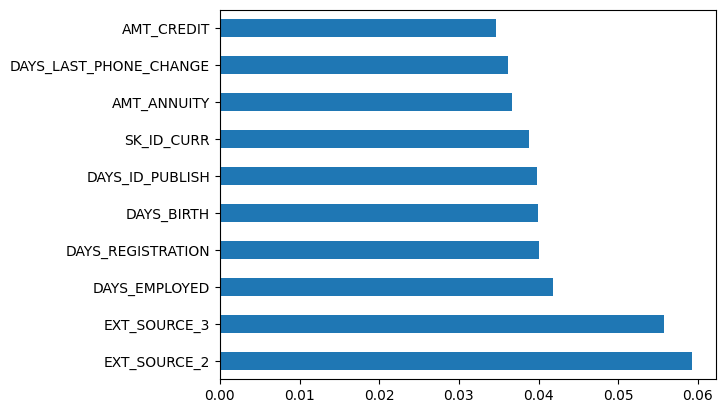

In [85]:
feature_importances = pd.Series(cl_rf.feature_importances_, index=X_cols.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

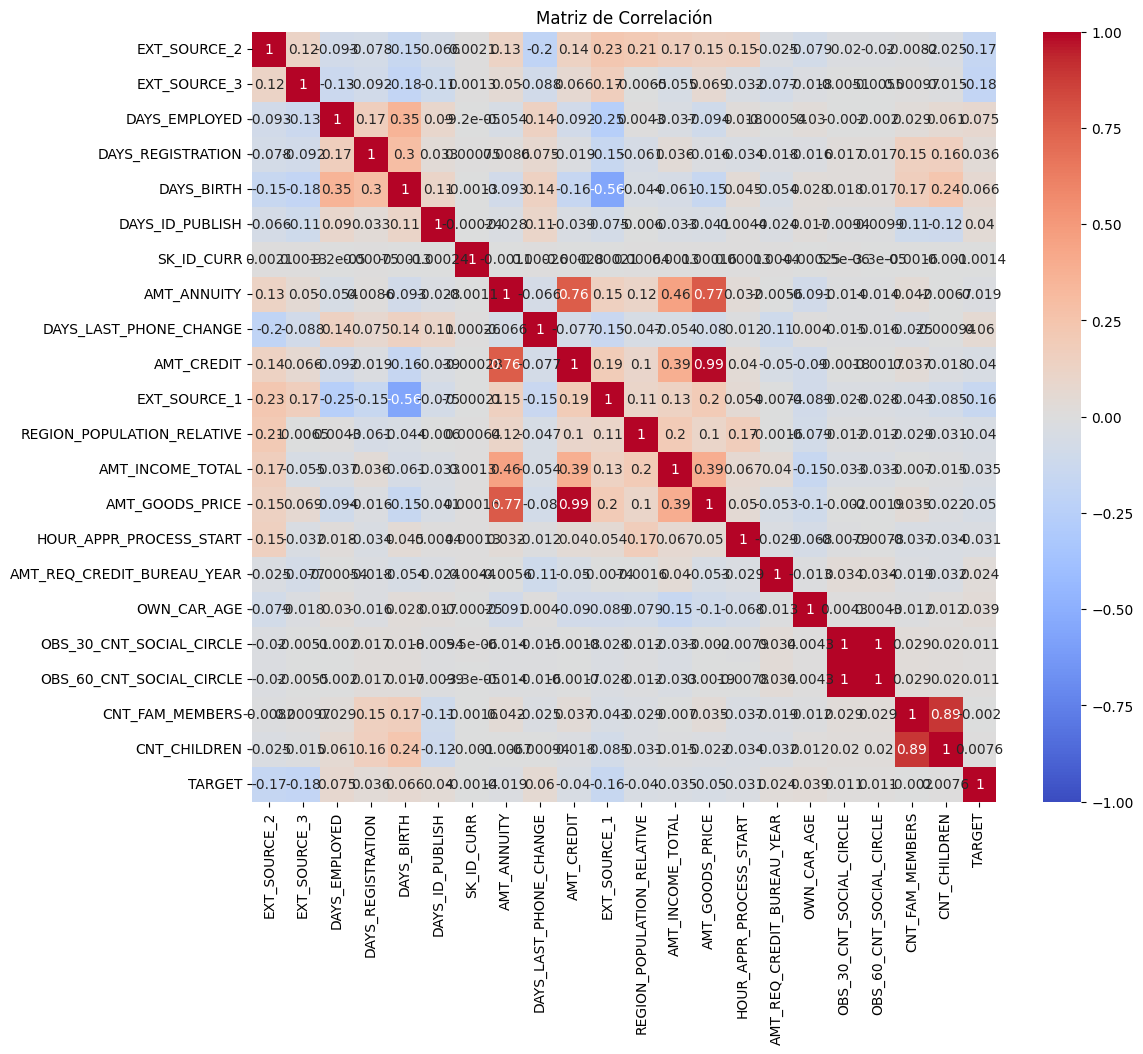

In [117]:
filtered_features = feature_importances[(feature_importances >= 0.01) & (feature_importances <= 0.06)]
filtered_features = filtered_features.sort_values(ascending=False)

filtered_features = filtered_features.index.to_list()
filtered_features.append('TARGET')
filtered_features
most_important_features_df = application_train_df[filtered_features]

# Calcula la matriz de correlación
corr_matrix = most_important_features_df.corr()

# Grafica la matriz de correlación usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()